In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('data_100k.csv')
data['request_type'] = data['request_type'].str.strip()

# Check unique values in 'request_type' column
print("Unique values request_type")
print(data['request_type'].unique())

data['request_type'] = data['request_type'].astype('category')

# One-hot encoding
data['request_type_debt'] = (data['request_type'] == 'debt').astype(int)
data['request_type_existence'] = (data['request_type'] == 'existence').astype(int)
data['request_type_payment'] = (data['request_type'] == 'payment').astype(int)

Unique values request_type
['payment' 'existence' 'debt']


In [6]:
features = ['total_quantity', 'business_quantity', 'personal_quantity',
            'request_type_debt', 'request_type_existence',
            'request_type_payment'] # Variables independientes
target = 'total_time' # Variable dependiente

X = data[features]
y = data[target]

# 80% entrenamiento y 20% de datos para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Entrenamos modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lin = lin_reg.predict(X_test)

# Metricas de evaluacion
y_train_pred_lin = lin_reg.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred_lin)
train_r2 = r2_score(y_train, y_train_pred_lin)
print(f"Regresión Lineal Entrenamiento - MSE: {train_mse}, R2: {train_r2}")

y_test_pred_lin = lin_reg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred_lin)
test_r2 = r2_score(y_test, y_test_pred_lin)
print(f"Regresión Lineal Validacion - MSE: {test_mse}, R2: {test_r2}")

Regresión Lineal Entrenamiento - MSE: 1433.0553165673025, R2: 0.8972830524983956
Regresión Lineal Validacion - MSE: 1433.572995882648, R2: 0.8957762296256438


In [8]:
# Entrenar el modelo de bosque aleatorio
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_train_pred_rf = rf_reg.predict(X_train)
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
print(f"Bosque Aleatorio Entrenamiento - MSE: {train_mse_rf}, R2: {train_r2_rf}")

# Predicciones y evaluación en el conjunto de validación
y_test_pred_rf = rf_reg.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f"Bosque Aleatorio Evaluacion - MSE: {test_mse_rf}, R2: {test_r2_rf}")

Bosque Aleatorio Entrenamiento - MSE: 756.7726748752827, R2: 0.9457568886440383
Bosque Aleatorio Evaluacion - MSE: 1894.126621410572, R2: 0.8622930129007462


<ipython-input-11-4215e452351b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


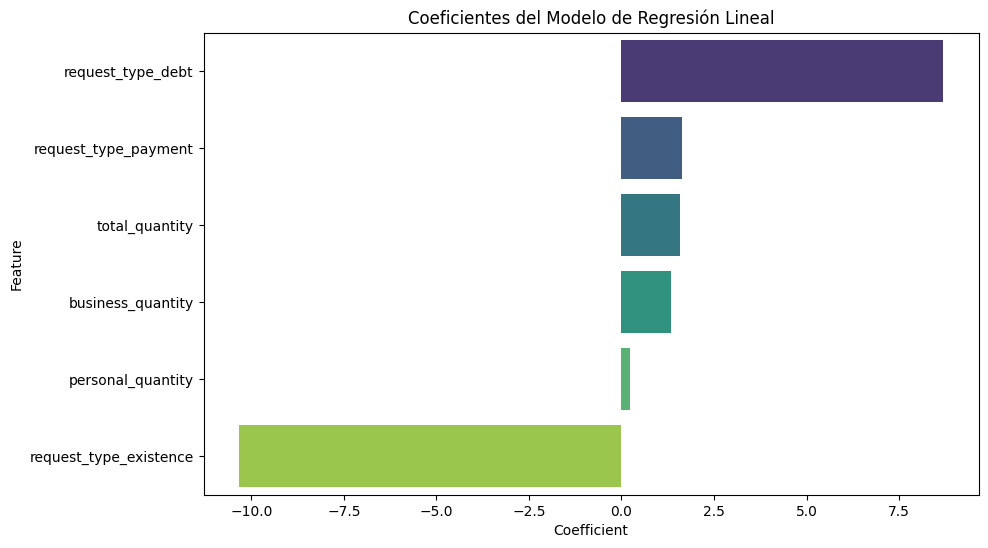

                  Feature  Coefficient
3       request_type_debt     8.696835
5    request_type_payment     1.645671
0          total_quantity     1.581418
1       business_quantity     1.345622
2       personal_quantity     0.235796
4  request_type_existence   -10.342506


<ipython-input-11-4215e452351b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


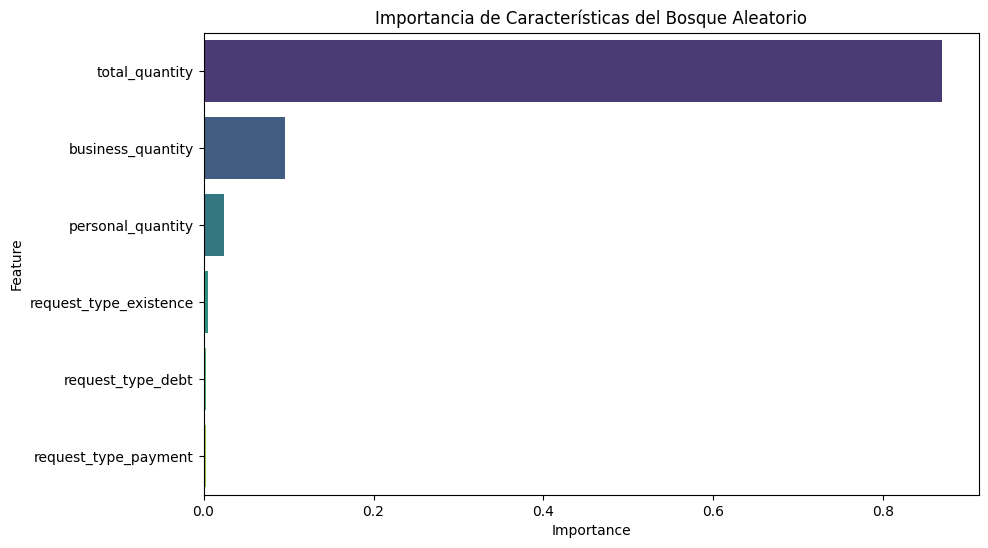

                  Feature  Importance
0          total_quantity    0.868440
1       business_quantity    0.095668
2       personal_quantity    0.024161
4  request_type_existence    0.005150
3       request_type_debt    0.003337
5    request_type_payment    0.003244


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Coeficientes de la regresión lineal
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lin_reg.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Importancia de características del bosque aleatorio
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_reg.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Graficar los coeficientes del modelo de regresión lineal
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Coeficientes del Modelo de Regresión Lineal')
plt.show()
print(coefficients)


# Graficar la importancia de características del bosque aleatorio
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de Características del Bosque Aleatorio')
plt.show()
print(feature_importances)